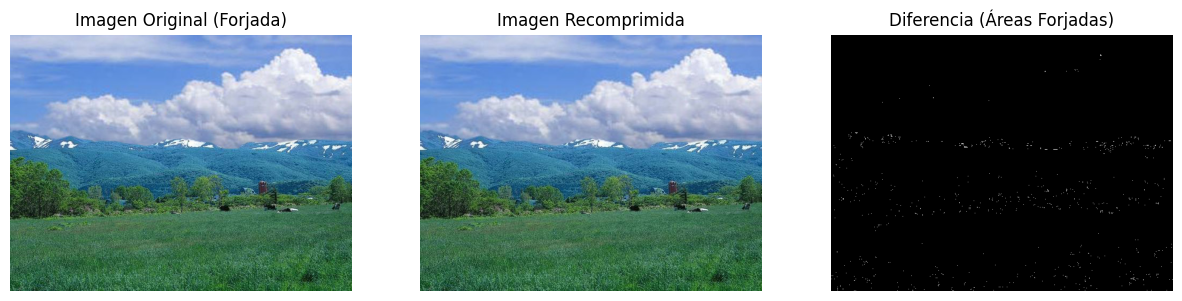

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Parámetros ajustables
calidad_compresion = 87 # Ajusta la calidad de compresión (0-100)
umbral_valor = 5  # Ajusta el valor del umbral (0-255)

# Función para recomprimir la imagen con una calidad específica
def recomprimir_imagen(imagen, calidad):
    encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), calidad]
    _, imagen_recomprimida_encoded = cv2.imencode('.jpg', imagen, encode_param)
    imagen_recomprimida = cv2.imdecode(imagen_recomprimida_encoded, cv2.IMREAD_COLOR)
    return imagen_recomprimida

image_path = '../data/CASIA2/Tp2/Tp_D_CNN_M_B_nat10139_nat00097_11948.jpg'

# Cargar la imagen original (forjada)
imagen_original = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Verificar que la imagen se haya cargado correctamente
if imagen_original is None:
    raise FileNotFoundError("No se pudo cargar la imagen original. Verifica la ruta del archivo.")

# Recomprimir la imagen
imagen_recomprimida = recomprimir_imagen(imagen_original, calidad_compresion)

# Calcular la diferencia entre la imagen original y la recomprimida
diferencia = cv2.absdiff(imagen_original, imagen_recomprimida)

# Convertir la diferencia a escala de grises para una mejor visualización
diferencia_gris = cv2.cvtColor(diferencia, cv2.COLOR_BGR2GRAY)

# Aplicar un umbral para resaltar las áreas forjadas
_, diferencia_umbral = cv2.threshold(diferencia_gris, umbral_valor, 255, cv2.THRESH_BINARY)

# Ajustar el umbral según sea necesario
if np.max(diferencia_umbral) == 0:
    print("No se detectaron diferencias significativas. Intenta ajustar el umbral o la calidad de compresión.")
else:
    # Visualizar las imágenes
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.title('Imagen Original (Forjada)')
    plt.imshow(cv2.cvtColor(imagen_original, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title('Imagen Recomprimida')
    plt.imshow(cv2.cvtColor(imagen_recomprimida, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title('Diferencia (Áreas Forjadas)')
    plt.imshow(diferencia_umbral, cmap='gray')
    plt.axis('off')

    plt.show()


2024-07-10 01:49:13.092775: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-10 01:49:13.093069: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-10 01:49:13.231748: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-10 01:49:13.504077: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-10 01:49:16.387895: W tensorflow/compiler/tf2

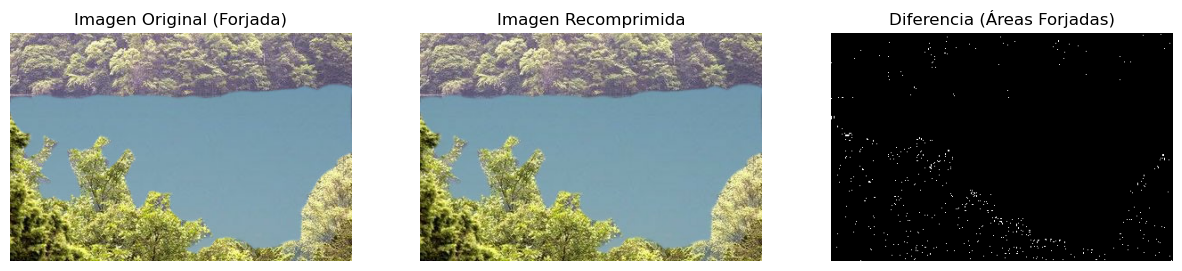

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Parámetros ajustables
calidad_compresion = 90 # Ajusta la calidad de compresión (0-100)
umbral_valor = 5 # Ajusta el valor del umbral (0-255)

# Función para recomprimir la imagen con una calidad específica
def recomprimir_imagen_tf(imagen, calidad):
    imagen_jpeg = tf.image.encode_jpeg(imagen, quality=calidad)
    imagen_recomprimida = tf.image.decode_jpeg(imagen_jpeg)
    return imagen_recomprimida

image_path = '../data/CASIA2/Tp2/Tp_D_CNN_M_N_nat00089_nat00062_10577.jpg'

# Cargar la imagen original (forjada)
imagen_original = tf.io.read_file(image_path)
imagen_original = tf.image.decode_jpeg(imagen_original, channels=3)

# Recomprimir la imagen
imagen_recomprimida = recomprimir_imagen_tf(imagen_original, calidad_compresion)

# Calcular la diferencia entre la imagen original y la recomprimida
diferencia = tf.abs(tf.cast(imagen_original, tf.int32) - tf.cast(imagen_recomprimida, tf.int32))

# Convertir la diferencia a escala de grises para una mejor visualización
diferencia_gris = tf.image.rgb_to_grayscale(diferencia)

# # Aplicar un umbral para resaltar las áreas forjadas
diferencia_umbral = tf.where(diferencia_gris > umbral_valor, 255, 0)

# Convertir el tensor a numpy para la visualización
imagen_original_np = imagen_original.numpy()
imagen_recomprimida_np = imagen_recomprimida.numpy()
diferencia_umbral_np = diferencia_umbral.numpy()

# Ajustar el umbral según sea necesario
if np.max(diferencia_umbral_np) == 0:
    print("No se detectaron diferencias significativas. Intenta ajustar el umbral o la calidad de compresión.")
else:
    # Visualizar las imágenes
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.title('Imagen Original (Forjada)')
    plt.imshow(imagen_original_np)
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title('Imagen Recomprimida')
    plt.imshow(imagen_recomprimida_np)
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title('Diferencia (Áreas Forjadas)')
    plt.imshow(diferencia_umbral_np.squeeze(), cmap='gray')
    plt.axis('off')

    plt.show()